In [ ]:
https://www.youtube.com/watch?v=MX3vRy4uxs4

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


### Importing Libraries

In [3]:
import yfinance as yf

In [4]:
sp500 = yf.Ticker("^GSPC")

In [5]:
sp500 = sp500.history(period="max")

In [6]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0,0
...,...,...,...,...,...,...,...
2022-11-18 00:00:00-05:00,3966.389893,3979.889893,3935.979980,3965.340088,4037360000,0,0
2022-11-21 00:00:00-05:00,3956.229980,3962.000000,3933.340088,3949.939941,3850690000,0,0
2022-11-22 00:00:00-05:00,3965.510010,4005.879883,3956.879883,4003.580078,3887990000,0,0


In [8]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2022-11-11 00:00:00-05:00', '2022-11-14 00:00:00-05:00',
               '2022-11-15 00:00:00-05:00', '2022-11-16 00:00:00-05:00',
               '2022-11-17 00:00:00-05:00', '2022-11-18 00:00:00-05:00',
               '2022-11-21 00:00:00-05:00', '2022-11-22 00:00:00-05:00',
               '2022-11-23 00:00:00-05:00', '2022-11-25 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23841, freq=None)

### Cleaning and Visualizing Stock Market Data

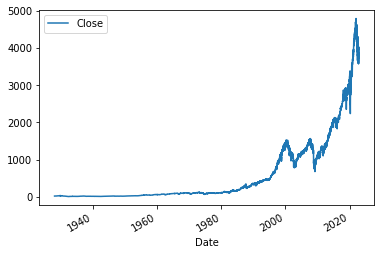

In [9]:
sp500.plot.line(y="Close", use_index=True)

In [10]:
del sp500["Dividends"]
del sp500["Stock Splits"]

### Setting Up Target for Machine Learning

In [11]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2022-11-18 00:00:00-05:00,3966.389893,3979.889893,3935.979980,3965.340088,4037360000,3949.939941
2022-11-21 00:00:00-05:00,3956.229980,3962.000000,3933.340088,3949.939941,3850690000,4003.580078
2022-11-22 00:00:00-05:00,3965.510010,4005.879883,3956.879883,4003.580078,3887990000,4027.260010


In [13]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2022-11-18 00:00:00-05:00,3966.389893,3979.889893,3935.979980,3965.340088,4037360000,3949.939941,0
2022-11-21 00:00:00-05:00,3956.229980,3962.000000,3933.340088,3949.939941,3850690000,4003.580078,1
2022-11-22 00:00:00-05:00,3965.510010,4005.879883,3956.879883,4003.580078,3887990000,4027.260010,1


In [15]:
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-11-18 00:00:00-05:00,3966.389893,3979.889893,3935.979980,3965.340088,4037360000,3949.939941,0
2022-11-21 00:00:00-05:00,3956.229980,3962.000000,3933.340088,3949.939941,3850690000,4003.580078,1
2022-11-22 00:00:00-05:00,3965.510010,4005.879883,3956.879883,4003.580078,3887990000,4027.260010,1


### Training An Initial Machine Learning Model

In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [17]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [18]:
import pandas as pd

preds = pd.Series(preds, index=test.index)
preds

Date
2022-07-07 00:00:00-04:00    1
2022-07-08 00:00:00-04:00    1
2022-07-11 00:00:00-04:00    1
2022-07-12 00:00:00-04:00    1
2022-07-13 00:00:00-04:00    1
                            ..
2022-11-18 00:00:00-05:00    0
2022-11-21 00:00:00-05:00    0
2022-11-22 00:00:00-05:00    0
2022-11-23 00:00:00-05:00    0
2022-11-25 00:00:00-05:00    1
Length: 100, dtype: int64

In [19]:
precision_score(test["Target"], preds)

0.3835616438356164

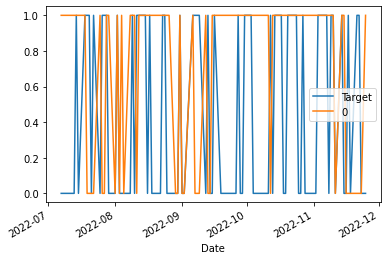

In [21]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

### Building A Backtesting System

In [27]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [28]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [29]:
predictions = backtest(sp500, model, predictors)

In [30]:
predictions["Predictions"].value_counts()

0    3373
1    2418
Name: Predictions, dtype: int64

In [31]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5301902398676592

In [32]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.534795
0    0.465205
Name: Target, dtype: float64

### Adding Additional Predictors To Our Model

In [ ]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages['Close']

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

sp500

In [ ]:
sp500 = sp500.dropna()
sp500

### Improving Our Model

In [36]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [37]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [38]:
predictions = backtest(sp500, model, new_predictors)

In [39]:
predictions["Predictions"].value_counts()

0.0    3978
1.0     812
Name: Predictions, dtype: int64

In [40]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5689655172413793